## Task 1: Bike Rental Forecasting – Project Overview

The goal of this project is to develop and evaluate regression models that predict the daily number of bike rentals based on weather, calendar, and seasonal data. The dataset comes from the Capital Bikeshare system in Washington, D.C., and is publicly available via the UCI repository.

In this notebook, we will:
1. Load and explore the dataset, identifying key variables and checking for missing values or duplicates.
2. Perform exploratory data analysis (EDA) to understand relationships between input features and the target variable (`cnt` – total count of rentals).
3. Prepare the data through encoding, scaling, and splitting into training and testing sets.
4. Build and evaluate multiple regression models (Linear Regression, Ridge, Lasso, Decision Trees, Random Forest, Gradient Boosting).
5. Assess model performance using metrics such as MAE, MSE, RMSE, and R².
6. Interpret feature importance and draw conclusions about the key factors influencing rental demand.
7. Summarize findings and reflect on possible improvements and future directions.

The final goal is to find the most accurate model and understand which features have the strongest impact on rental predictions.


## Import required libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### 1. Data Loading and Initial Exploration


>>> Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

>>> Descriptive statistics:
          instant      season          yr     

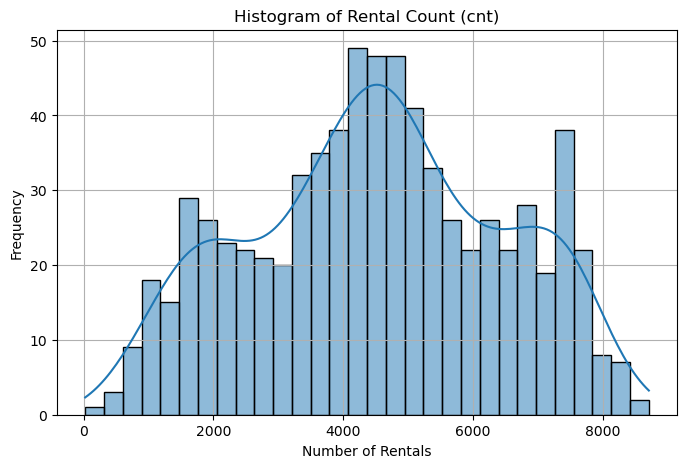


>>> Feature: temp
- Data type: float64
- Descriptive statistics:
count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64
- Unique values: [0.344167  0.363478  0.196364  0.2       0.226957  0.204348  0.196522
 0.165     0.138333  0.150833  0.169091  0.172727  0.16087   0.233333
 0.231667  0.175833  0.216667  0.292174  0.261667  0.1775    0.0591304
 0.0965217 0.0973913 0.223478  0.2175    0.195     0.203478  0.216522
 0.180833  0.192174  0.26      0.186957  0.211304  0.285833  0.271667
 0.220833  0.134783  0.144348  0.189091  0.2225    0.316522  0.415
 0.266087  0.318261  0.435833  0.521667  0.399167  0.285217  0.303333
 0.182222  0.221739  0.295652  0.364348  0.2825    0.343478  0.407273
 0.266667  0.335     0.198333  0.384167  0.376522  0.261739  0.2925
 0.295833  0.389091  0.329167  0.384348  0.325217  0.317391  0.365217
 0.54      0.4725    0.3325    0.4

In [21]:
# Load data into a DataFrame
df = pd.read_csv("day.csv")

# Check the structure of the data
print(">>> Dataset info:")
df.info()

# Basic descriptive statistics
print("\n>>> Descriptive statistics:")
print(df.describe())

# Check data types
print("\n>>> Data types:")
print(df.dtypes)

# Check for missing values
print("\n>>> Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\n>>> Number of duplicated rows:")
print(df.duplicated().sum())

# Target variable: cnt
print("\n>>> Target variable 'cnt' statistics:")
print(f"Mean: {df['cnt'].mean():.2f}")
print(f"Median: {df['cnt'].median():.2f}")
print(f"Standard Deviation: {df['cnt'].std():.2f}")
print(f"Min: {df['cnt'].min()}, Max: {df['cnt'].max()}")

# Histogram of the 'cnt' variable
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Histogram of Rental Count (cnt)")
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Input features to explore
features = ['temp', 'atemp', 'hum', 'windspeed', 'weekday', 'season', 'workingday', 'holiday']

# Descriptive stats and types for input features
for col in features:
    print(f"\n>>> Feature: {col}")
    print("- Data type:", df[col].dtypes)
    print("- Descriptive statistics:")
    print(df[col].describe())
    print("- Unique values:", df[col].unique())



### 2. Exploratory Data Analysis

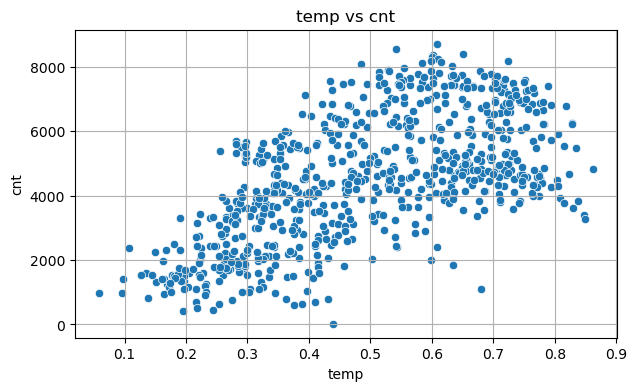

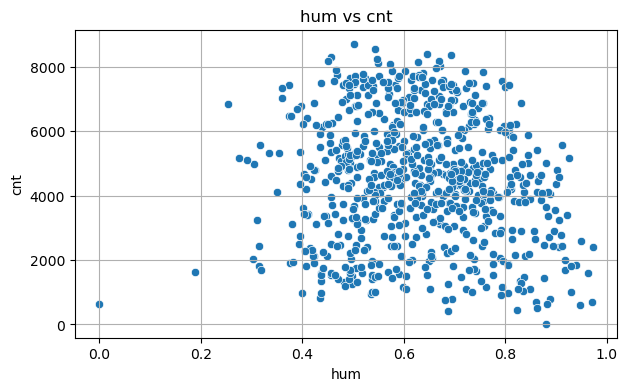

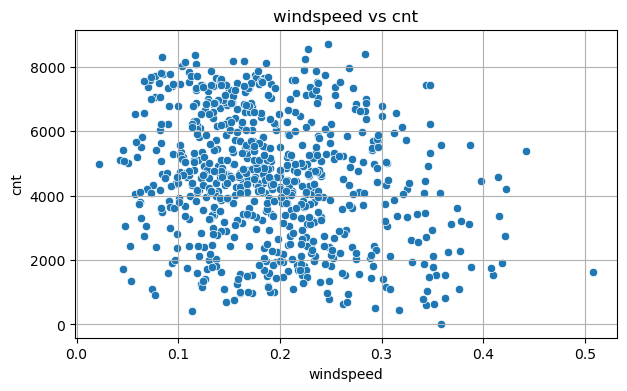

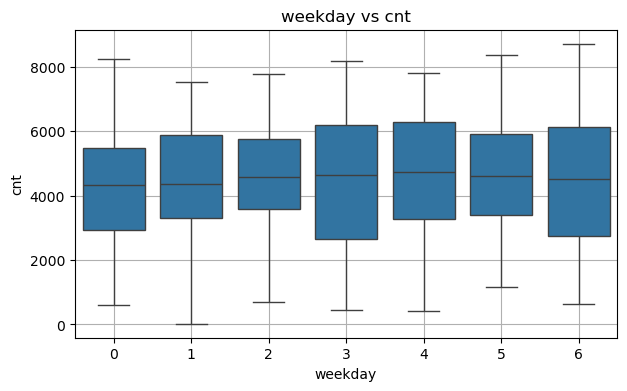

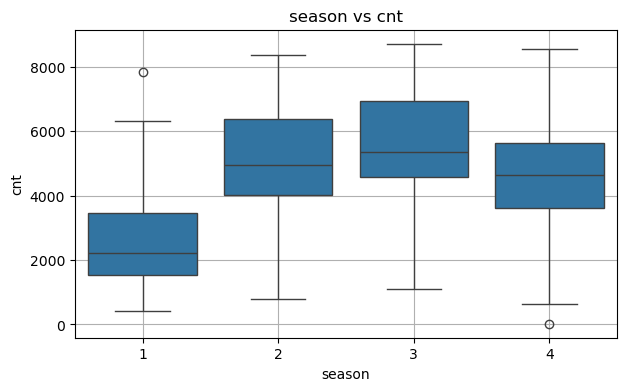

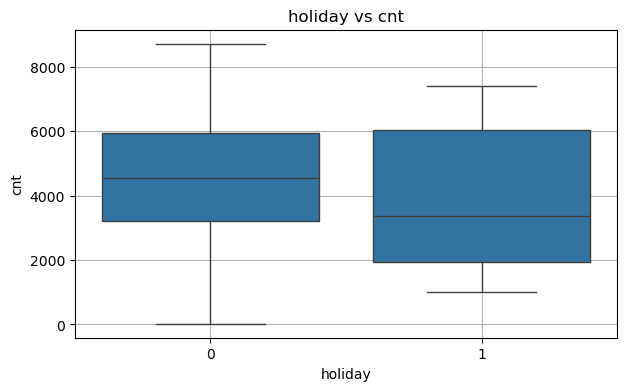

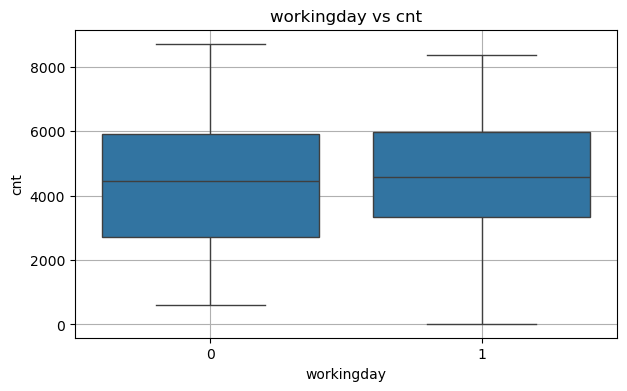

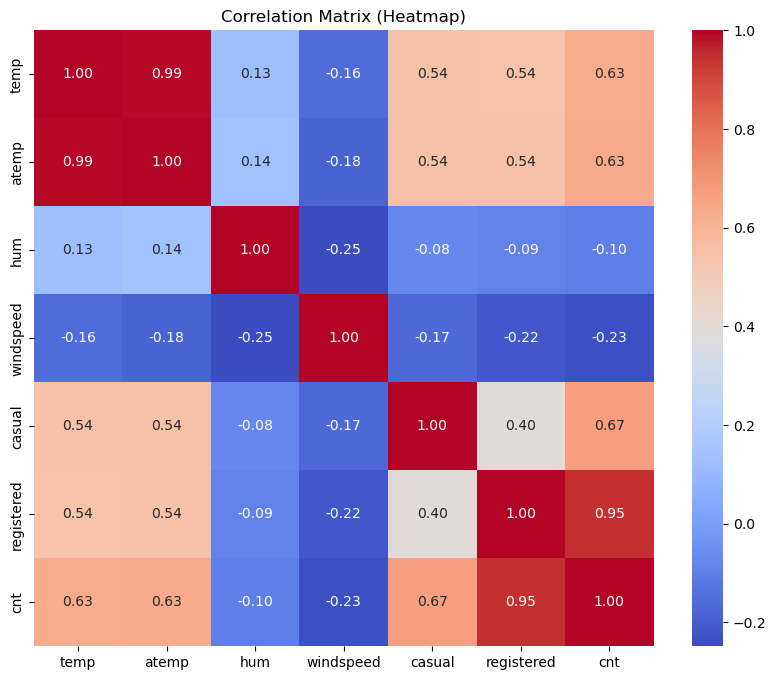

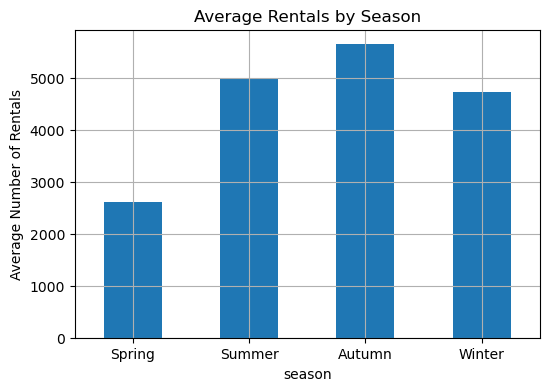

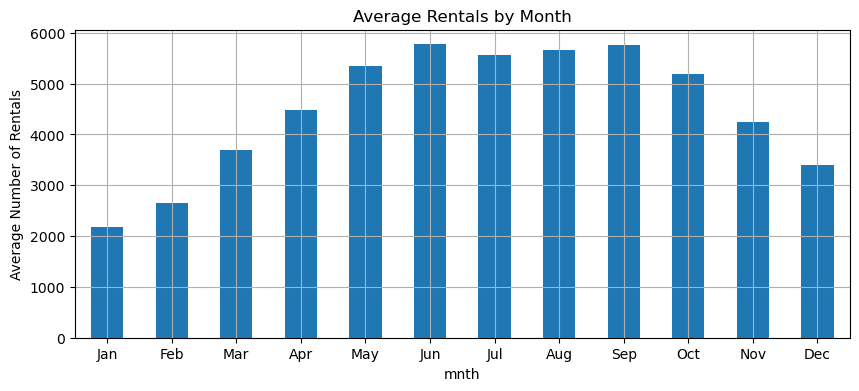

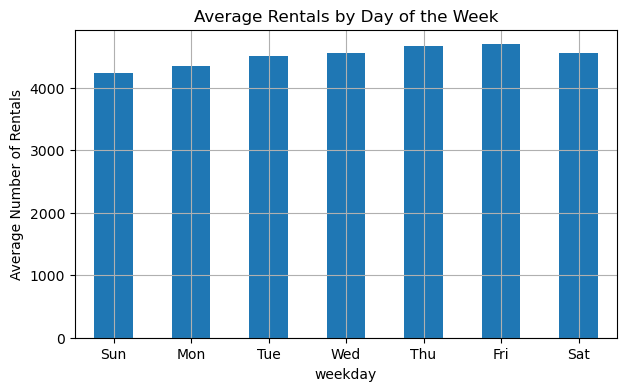

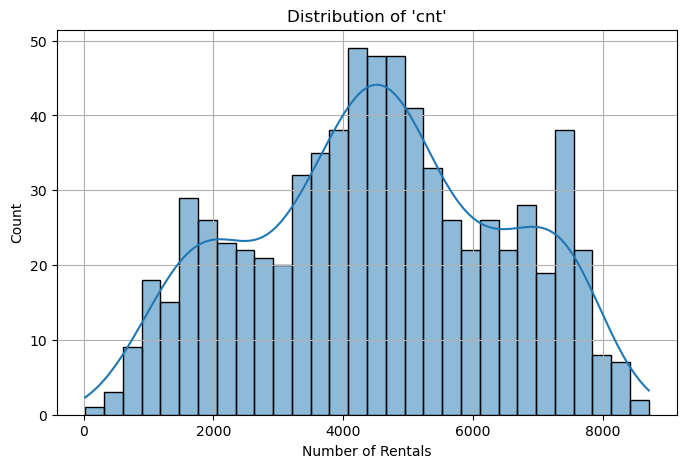

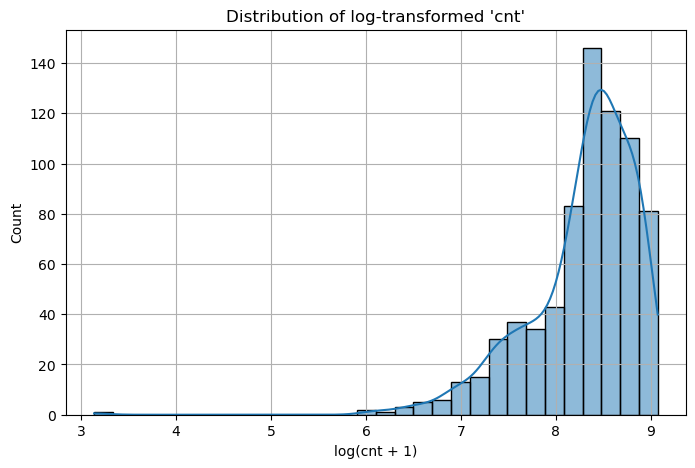

In [22]:
# List of input features
numeric_features = ['temp', 'hum', 'windspeed']
categorical_features = ['weekday', 'season', 'holiday', 'workingday']

# Scatter plots for numeric features vs. 'cnt'
for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df, x=feature, y='cnt')
    plt.title(f'{feature} vs cnt')
    plt.grid(True)
    plt.show()

# Boxplots for categorical features vs. 'cnt'
for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=feature, y='cnt')
    plt.title(f'{feature} vs cnt')
    plt.grid(True)
    plt.show()
    
# Correlation matrix + heatmap
plt.figure(figsize=(10, 8))
correlation_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Heatmap)")
plt.show()

# Seasonality: mean number of rentals by season, month, weekday
season_labels = ['Spring', 'Summer', 'Autumn', 'Winter']
weekday_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Seasonality by season
plt.figure(figsize=(6, 4))
df.groupby('season')['cnt'].mean().plot(kind='bar')
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels, rotation=0)
plt.title("Average Rentals by Season")
plt.ylabel("Average Number of Rentals")
plt.grid(True)
plt.show()

# Seasonality by month
plt.figure(figsize=(10, 4))
df.groupby('mnth')['cnt'].mean().plot(kind='bar')
plt.xticks(ticks=np.arange(12), labels=month_labels, rotation=0)
plt.title("Average Rentals by Month")
plt.ylabel("Average Number of Rentals")
plt.grid(True)
plt.show()

# Seasonality by weekday
plt.figure(figsize=(7, 4))
df.groupby('weekday')['cnt'].mean().plot(kind='bar')
plt.xticks(ticks=np.arange(7), labels=weekday_labels, rotation=0)
plt.title("Average Rentals by Day of the Week")
plt.ylabel("Average Number of Rentals")
plt.grid(True)
plt.show()

# Distribution of 'cnt'
plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of 'cnt'")
plt.xlabel("Number of Rentals")
plt.grid(True)
plt.show()

# Logarithmic transformation of 'cnt' and new histogram
df['cnt_log'] = np.log1p(df['cnt'])

plt.figure(figsize=(8, 5))
sns.histplot(df['cnt_log'], bins=30, kde=True)
plt.title("Distribution of log-transformed 'cnt'")
plt.xlabel("log(cnt + 1)")
plt.grid(True)
plt.show()

# The original distribution of 'cnt' is slightly right-skewed. After applying the logarithmic transformation (log1p), the new distribution 
# becomes more symmetric and closer to a normal distribution. This justifies using the log transform.


### 3. Data Preparation

In [23]:
# Target variable – use the log-transformed version of 'cnt'
y = df['cnt_log']

# Select input features – drop original 'cnt' and other unnecessary columns
X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'cnt_log'])

# List of categorical and numerical features
categorical_features = ['season', 'weathersit', 'weekday', 'mnth', 'holiday', 'workingday']
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scale numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Show resulting shapes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (584, 29)
Test set size: (147, 29)


### 4. Building Regression Models

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Dictionary of models with sample hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
}

# Dictionary to store trained models
trained_models = {}

# Train each model and store it
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✅ {name} — model trained.")


✅ Linear Regression — model trained.
✅ Ridge Regression — model trained.
✅ Lasso Regression — model trained.
✅ Decision Tree — model trained.
✅ Random Forest — model trained.
✅ Gradient Boosting — model trained.


### 5. Model Evaluation

,MAE (Train),RMSE (Train),R2 (Train),MAE (Test),RMSE (Test),R2 (Test)
Model,,,,,,
Linear Regression,659.881,880.448,0.789,633.500,935.518,0.782
Ridge Regression,658.848,876.301,0.791,633.801,927.555,0.785
Lasso Regression,745.144,987.748,0.734,724.759,982.085,0.759
Decision Tree,560.912,737.135,0.852,656.298,925.252,0.787
Random Forest,259.563,347.497,0.967,498.005,716.283,0.872
Gradient Boosting,234.763,316.060,0.973,483.617,687.335,0.882


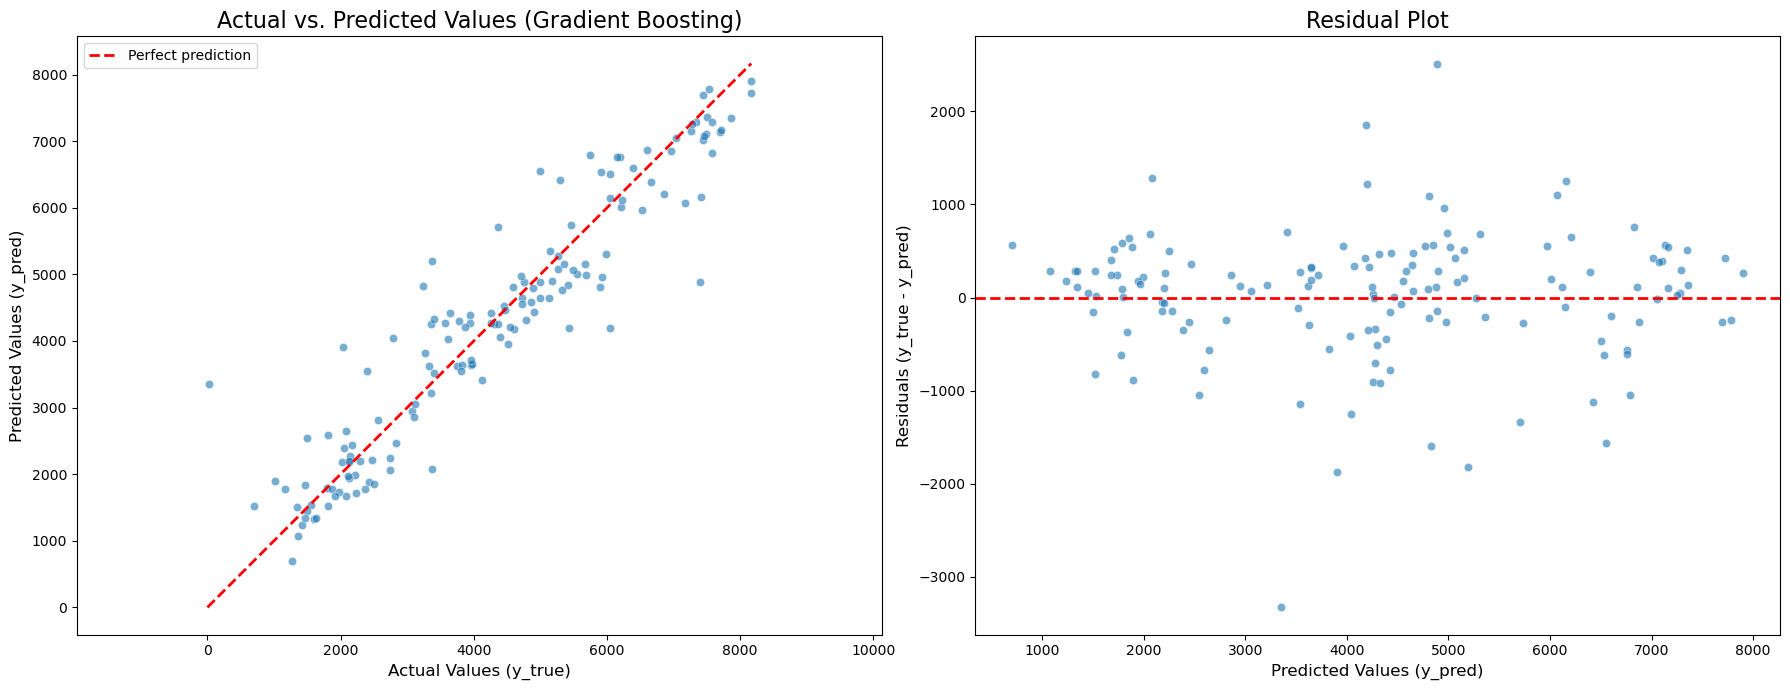

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# List to store performance metrics (original scale)
results_list = []

# Evaluate each model
for name, model in trained_models.items():
    # ---- TRAIN ----
    y_train_pred_log = model.predict(X_train)
    y_train_pred = np.expm1(y_train_pred_log)
    y_train_true = np.expm1(y_train)

    mae_train = mean_absolute_error(y_train_true, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    r2_train = r2_score(y_train_true, y_train_pred)

    # ---- TEST ----
    y_test_pred_log = model.predict(X_test)
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_true = np.expm1(y_test)

    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2_test = r2_score(y_test_true, y_test_pred)

    results_list.append({
        'Model': name,
        'MAE (Train)': mae_train,
        'RMSE (Train)': rmse_train,
        'R2 (Train)': r2_train,
        'MAE (Test)': mae_test,
        'RMSE (Test)': rmse_test,
        'R2 (Test)': r2_test
    })

# Create and display results DataFrame
results_df = pd.DataFrame(results_list).set_index('Model')
pd.options.display.float_format = '{:.3f}'.format
display(results_df)

# Select best model by R2 (Test)
best_model_name = results_df['R2 (Test)'].idxmax()
best_model = trained_models[best_model_name]

# Generate predictions and residuals on test set
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)
residuals = y_true - y_pred

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot: y_true vs y_pred
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, ax=axes[0])
axes[0].set_title(f'Actual vs. Predicted Values ({best_model_name})', fontsize=16)
axes[0].set_xlabel('Actual Values (y_true)', fontsize=12)
axes[0].set_ylabel('Predicted Values (y_pred)', fontsize=12)
axes[0].plot([0, y_true.max()], [0, y_true.max()], color='red', linestyle='--', lw=2, label='Perfect prediction')
axes[0].legend()
axes[0].axis('equal')

# Residual plot
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[1])
axes[1].set_title('Residual Plot', fontsize=16)
axes[1].set_xlabel('Predicted Values (y_pred)', fontsize=12)
axes[1].set_ylabel('Residuals (y_true - y_pred)', fontsize=12)
axes[1].axhline(y=0, color='red', linestyle='--', lw=2)

plt.tight_layout()
plt.show()


#### Evaluation of Systematic Prediction Error

Based on the scatter plots, the Gradient Boosting model does not show a systematic prediction error across most of the data range. However, for very high values of the target variable (`cnt`), there is a slight tendency to underestimate.

This is visible in the residual plot, where some negative residuals appear at higher predicted values.

Nevertheless, the overall distribution of errors is well-balanced, indicating a high-quality model fit.
